<a href="https://colab.research.google.com/github/krunal310/Banknote-Authentication/blob/main/bank_note_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Bank Note Authentication/BankNote_Authentication.csv')

In [5]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7fdea5c18>,
      dtype=object)

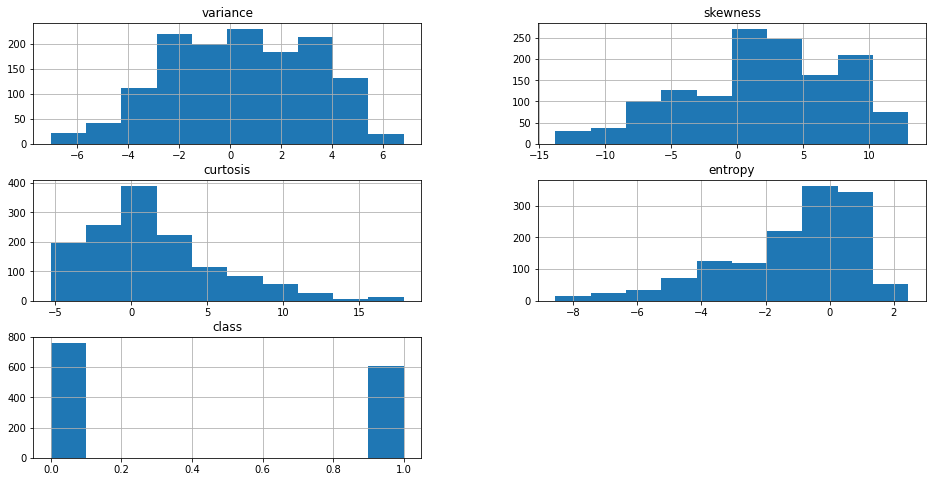

In [7]:
df.hist(figsize=(16,8),layout=(3,2),bins=10)

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

#Scale and centre the data

df_normalised = scaler.transform(X)

#Create a pandas dataframe

df_normalised = pd.DataFrame(data = X, index= X.index, columns= X.columns)


In [12]:
df_normalised.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=df['class'])

In [14]:
from keras.layers import Dropout

In [15]:
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(80, activation=tf.nn.relu),
    Dropout(0.2),
	  keras.layers.Dense(40, activation=tf.nn.relu),
    Dropout(0.2),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 80)                400       
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 3,681
Trainable params: 3,681
Non-trainable params: 0
______________________________________________________

In [16]:
model.fit(X_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
960/960 [==============================] - 1s 1ms/step - loss: 0.1567 - accuracy: 0.9490
Epoch 2/50
960/960 [==============================] - 1s 1ms/step - loss: 0.0208 - accuracy: 0.9979
Epoch 3/50
960/960 [==============================] - 1s 1ms/step - loss: 0.0101 - accuracy: 0.9958
Epoch 4/50
960/960 [==============================] - 1s 1ms/step - loss: 0.0104 - accuracy: 0.9979
Epoch 5/50
960/960 [==============================] - 1s 1ms/step - loss: 0.0028 - accuracy: 0.9990
Epoch 6/50
960/960 [==============================] - 1s 1ms/step - loss: 8.0737e-04 - accuracy: 1.0000
Epoch 7/50
960/960 [==============================] - 1s 1ms/step - loss: 9.7474e-04 - accuracy: 1.0000
Epoch 8/50
960/960 [==============================] - 1s 1ms/step - loss: 5.4455e-04 - accuracy: 1.0000
Epoch 9/50
960/960 [==============================] - 1s 1ms/step - loss: 1.3017e-04 - accuracy: 1.0000
Epoch 10/50
960/960 [==============================] - 1s 1ms/step - loss: 1.4173e-0

In [18]:
model.save("/content/model.h5")